# Titanic Data


#### Vụ đắm tàu Titanic xảy ra ngày 15 tháng 04 năm 1912 làm chết 1502 người trên tổng số 2224 hành khách và thủ thủ đoàn.  
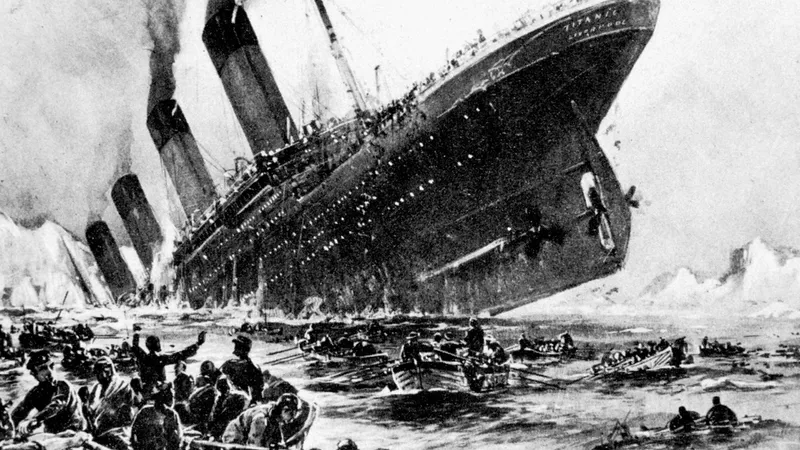

In [1]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="1120" height="630" src="https://www.youtube.com/embed/F2RnxZnubCM?si=bL3uFUVuPOkpMy1c" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

C:\Users\giang\anaconda3\envs\ml\lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Đọc và kiểm tra dữ liệu

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('./train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age, Cabin and Embarked** có giá trị bị thiếu.

### Có baoo nhiêu người sống sót??

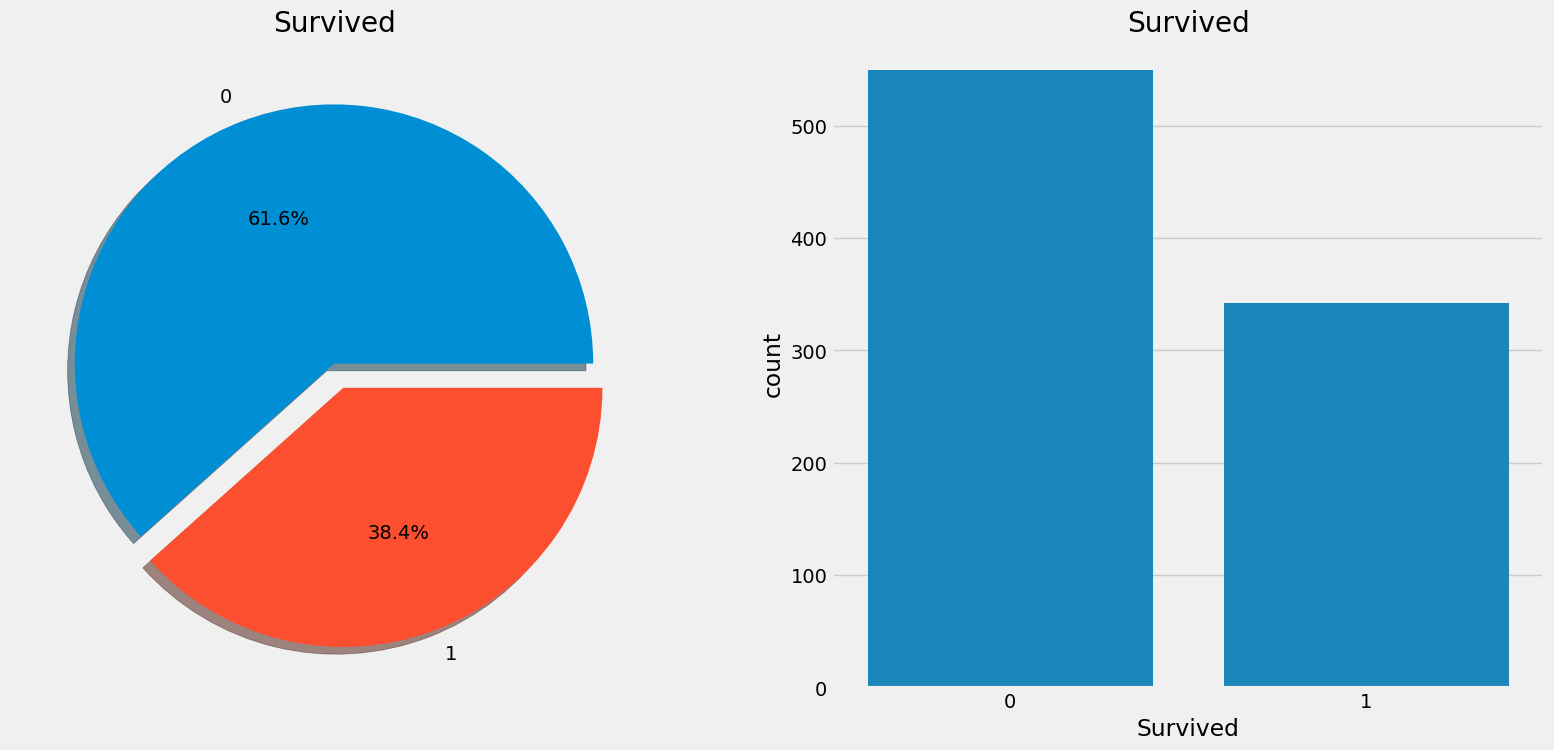

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Không nhiều người có thể sống sót trong thảm họa này. 

Trong tổng số **891 hành khách** của tập dữ liệu huấn luyện, chỉ có **350 người sống sót** chiếm **38,4%**.

## Phân tích các thuộc tính

### Sex (Giới tính)--> Categorical Feature

In [7]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

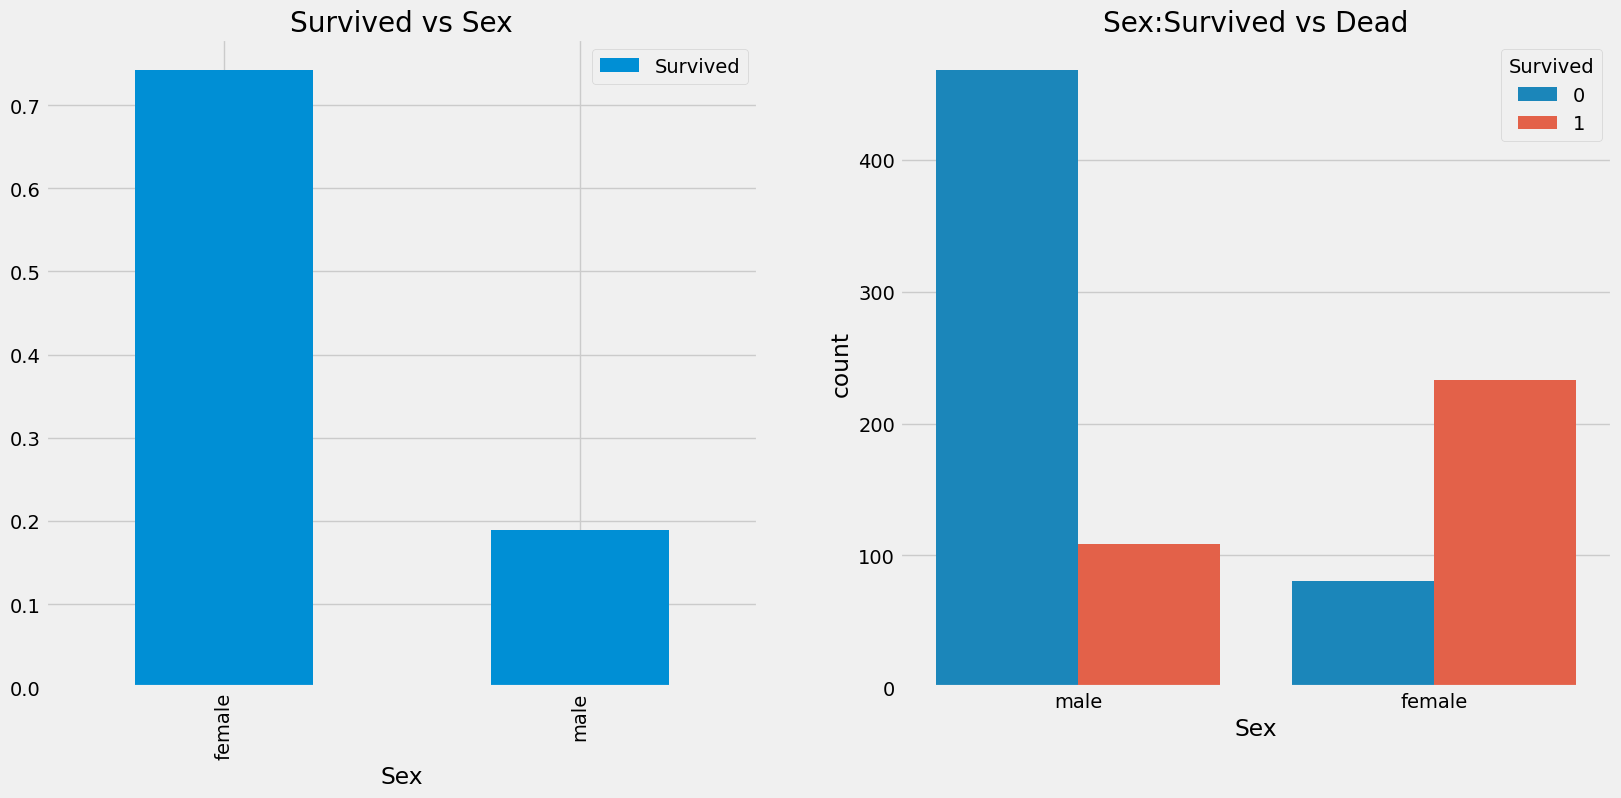

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

Có nhiều hành khách đàn ông hơn phụ nữ. 

Số lượng phụ nữ sống sót nhiều gần gấp đôi đàn ông sống sót. 

**Tỉ lệ sống sót của hành khách phụ nữ là khoảng 75%. Trong khi đó, tỉ lệ sống sót của hành khách là đàn ông chỉ chiếm 18-19%.**

=> Thuộc tính Sex (giới tính) là một thuộc tính quan trọng trong bài toán này.

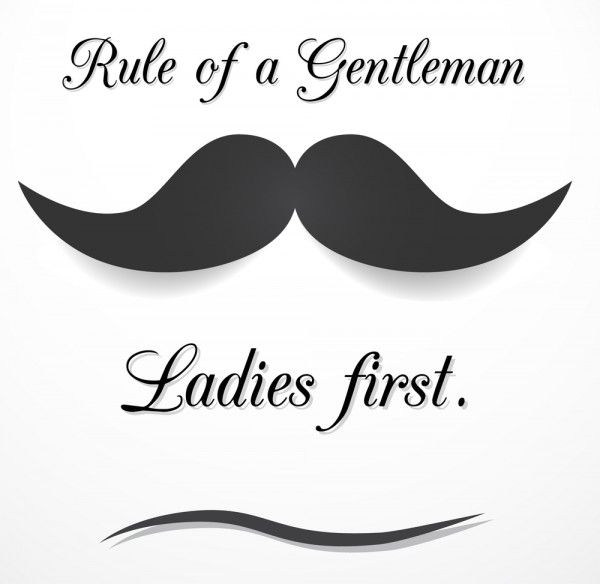

### Pclass (Hạng vé)--> Ordinal Feature

In [9]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


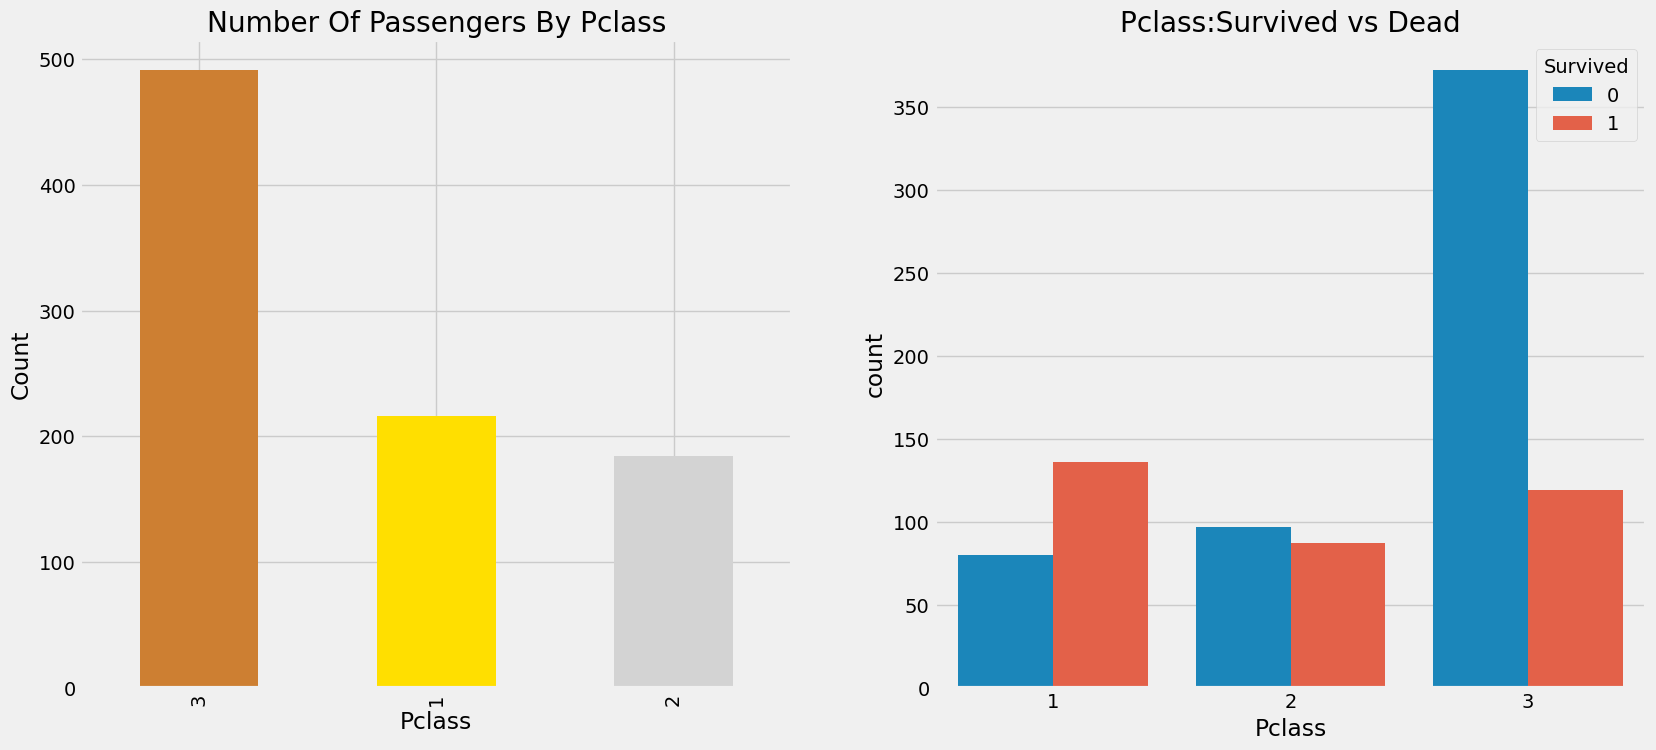

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

**Tiền có thể mua được mọi thứ**.  
Trong trường hợp này chúng ta thấy các hành khách vé hạng Nhất sẽ nhận được nhiều ưu tiên hơn khi được giải cứu.  
Hành khách đi vé hạng Nhất có tỉ lệ sống sót là **63%** trong khi hạng 2 là khoảng **48%**. Và hạng 3 rất thấp chỉ khoảng **24%**.


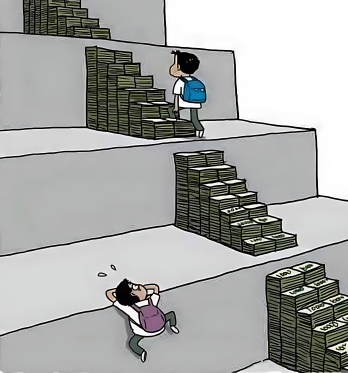

Kiểm tra xem vậy trong các hạng vé tỉ lệ sống sót theo giới tính là bao nhiêu?

In [11]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

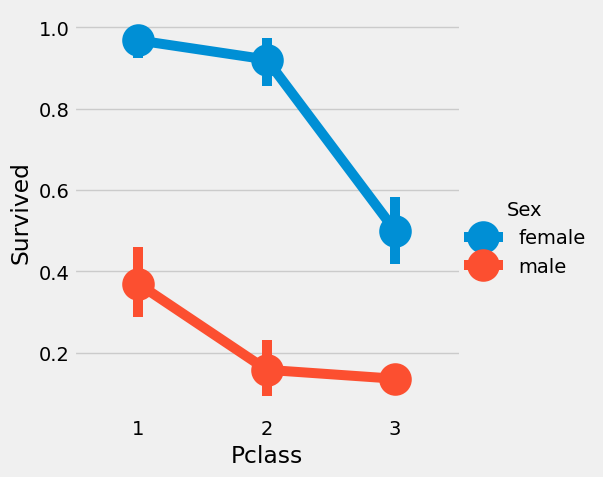

In [12]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=data, kind="point")
plt.show()

Ta thấy tỉ lệ sống sót của phụ nữ nhóm vé hạng nhất là rất cao khoảng 95%. Trong 94 hành khách là phụ nữ chỉ có 3 người thiệt mạng.  

Bất cứ là vé hạng nào, hành khách là phụ nữ đều nhận được ưu tiên cao hơn nam giới. Ngay cả là hành khách nam giới có vé hạng nhất thì tỉ lệ sống sót cũng rất thấp chỉ khoảng hơn 36%.  

=> Thuộc tính Pclass (hạng vé) là một thuộc tính quan trọng trong bài toán này.

### Age (Tuổi)--> Continous Feature


In [13]:
print('Hành khách nhiều tuổi nhất:',data['Age'].max(),'Tuổi')
print('Hành khách ít tuổi nhất:',data['Age'].min(),'Tuổi')
print('Độ tuổi trung bình:',data['Age'].mean(),'Tuổi')

Hành khách nhiều tuổi nhất: 80.0 Tuổi
Hành khách ít tuổi nhất: 0.42 Tuổi
Độ tuổi trung bình: 29.69911764705882 Tuổi


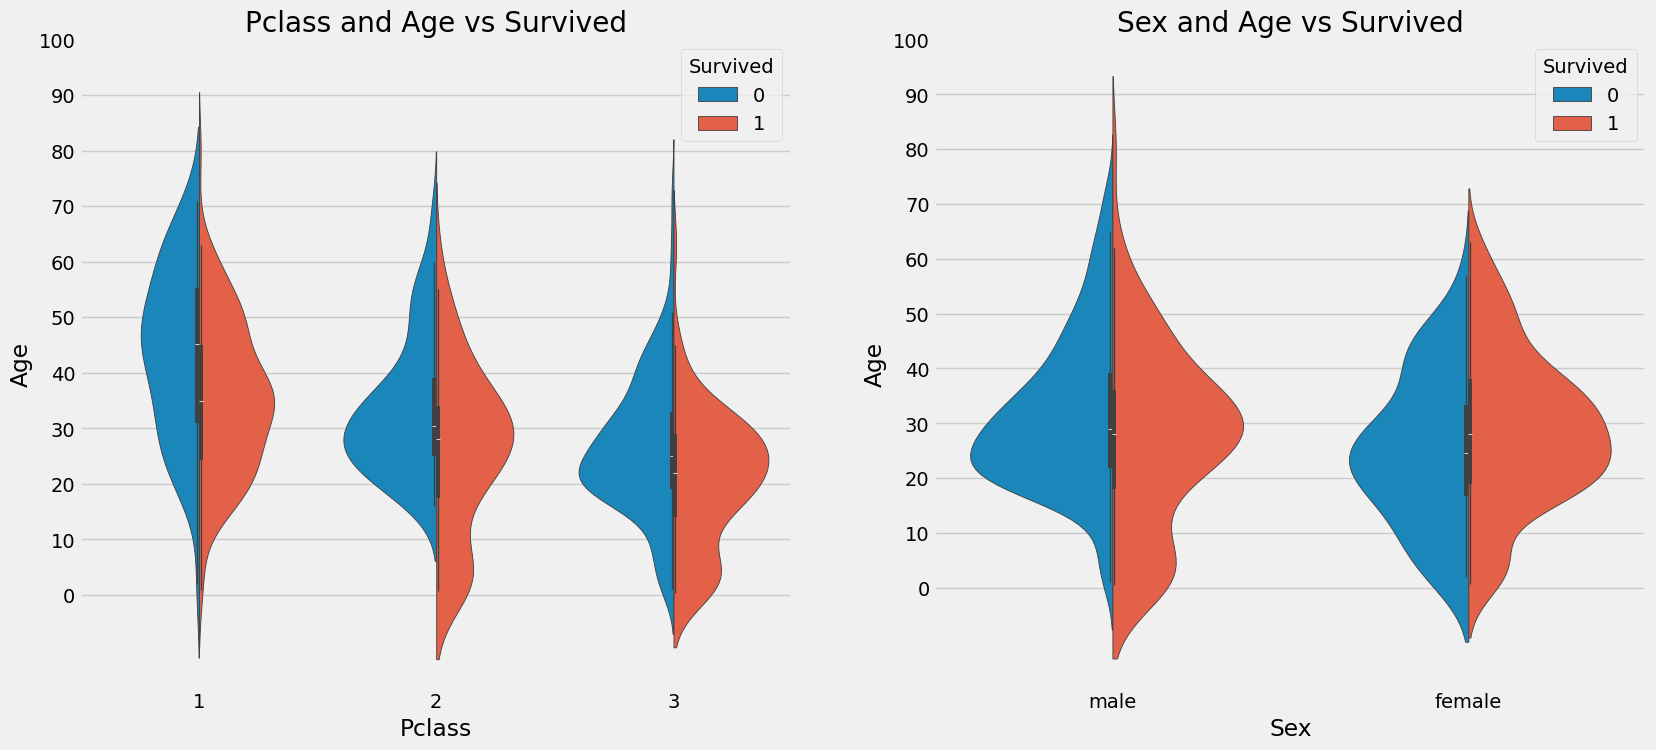

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Nhận xét:

1)Số lượng hành khách là trẻ em tăng lên theo hạng vé. Tỉ lệ sống sót của hành khách trẻ em (dưới 10 tuổi) là khá cao.

2)Tỉ lệ sống sót của hành khách trong độ tuổi từ 20 đến 50 cao, đặc biệt là hành khách nữ.

3)Với nam giới, tỉ lệ sống sót giảm xuống khi tuổi tăng lên.

Như chúng ta biết, thuộc tính Age có **177** bị thiếu dữ liệu. Để giải quyết vấn đề này chúng ta có thể điền giá trị độ tuổi trung bình của hành khách vào các vị trí dữ liệu bị thiếu này.

Tuy nhiên có một vấn đề là độ tuổi của mỗi người khá phân tán, chúng ta không thể sử dụng độ tuổi trung bình 29 để thay làm tuổi cho một hành khách có thể chỉ là một em bé 4 tuổi, như vậy sẽ làm ảnh hưởng rất nhiều đến các dự đoán về sau. Vậy có cách nào để đoán được khoảng tuổi của một hành khách không?

Có một ý tưởng hay đó là chúng ta có thể kiểm tra thuộc tính **Name** (Tên) của hành khách. Khi kiểm tra thuộc tính này ta sẽ thấy ở phần tên còn có cách gọi của hành khách như "Mr" (ông) hay "Mrs" (bà). Vì vậy chúng ta có thể tìm được độ tuổi trung bình phù hợp hơn với từng nhóm hành khách.

#### Thuộc tính **Name**

In [15]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

Để lấy phần danh xưng trong tên các hành khách chúng ta sử dụng biểu thức chính quy: **[A-Za-z]+)\.**. Với biểu thức này chúng ta sẽ đi tìm các chuỗi gồm các kí tự **A-Z hoặc a-z** và theo sau bởi một dấu **"." (chấm)**.

In [16]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Có một vài danh xưng bị nhập sai chính tả là "Mlle" và "Mme" thực ra phải là "Miss". chúng ta sẽ thay thế chúng bởi "Miss".  
Một số danh xưng khác ví dụ như "Dr" hoặc "Major" sẽ được chuyển thành "Mr", hay "Jonkheer", "Col", "Rev" thành "Other"...

In [17]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [18]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filling NaN Ages

In [19]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [20]:
data.Age.isnull().any() #So no null values left finally 

False

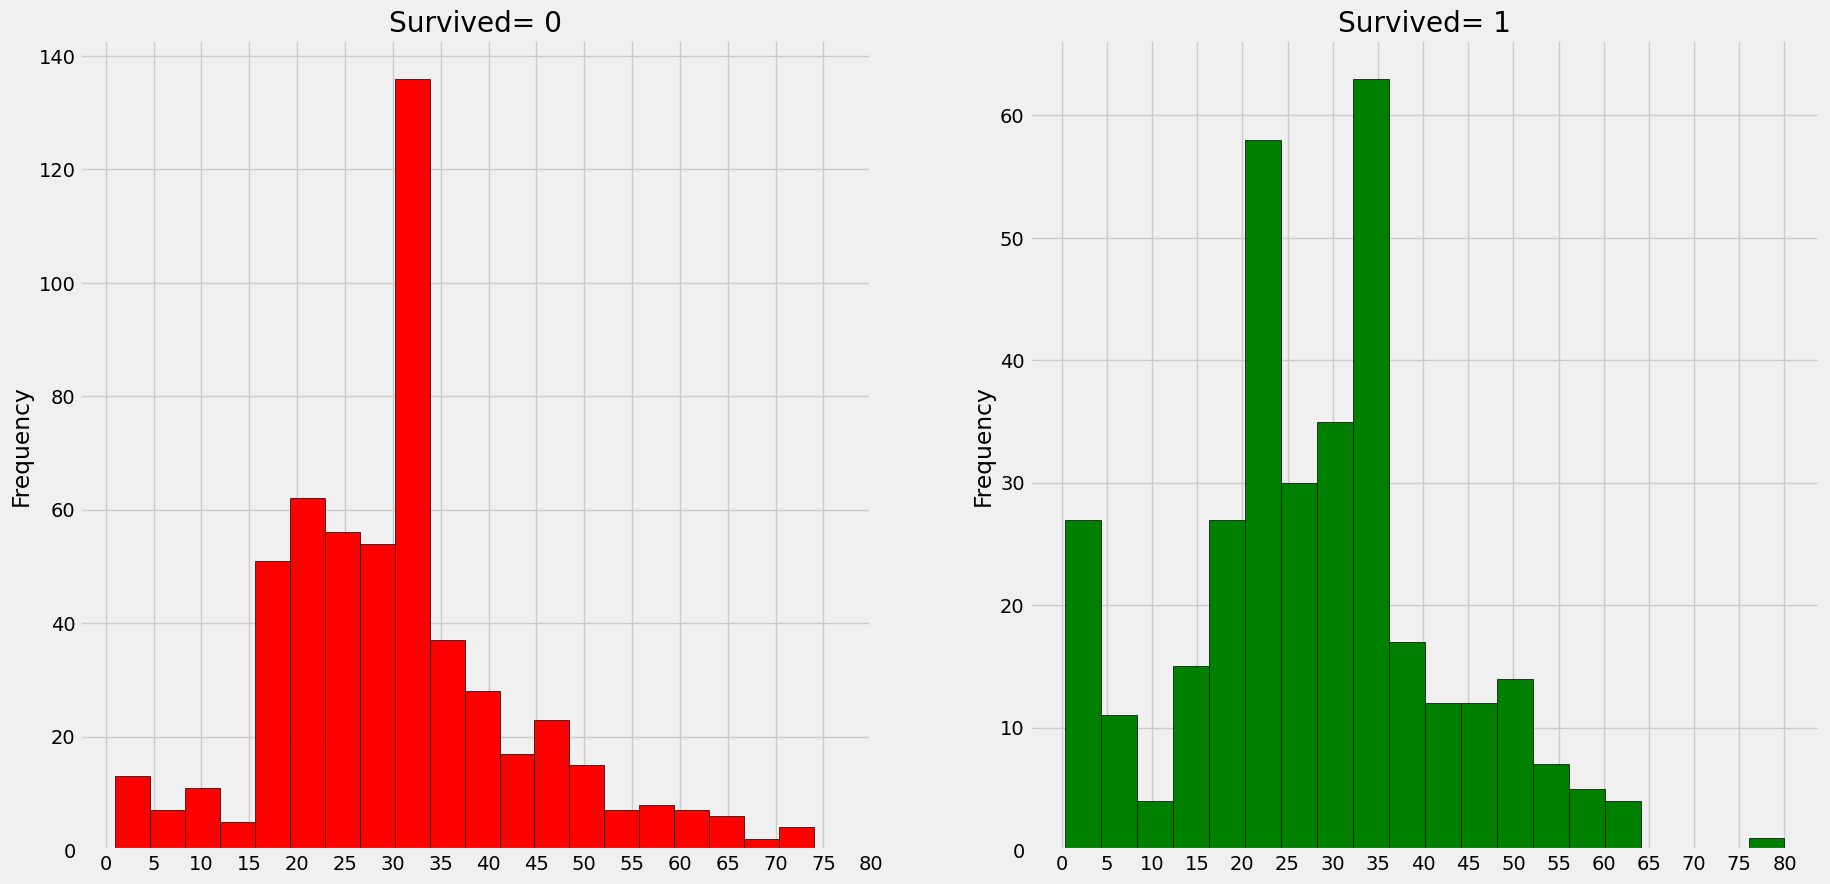

In [21]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

#### Nhận xét:
1)Trẻ nhỏ(age<5) được cứu sống rất nhiều (Chính sách ưu tiên phụ nữ và trẻ em khi giải cứu).

2)Hành khách nhiều tuổi nhất đã được cứu sống (80 tuổi).

3)Nhóm tuổi có nhiều hành khách tử vong nhất là nhóm từ 30-40 tuổi.

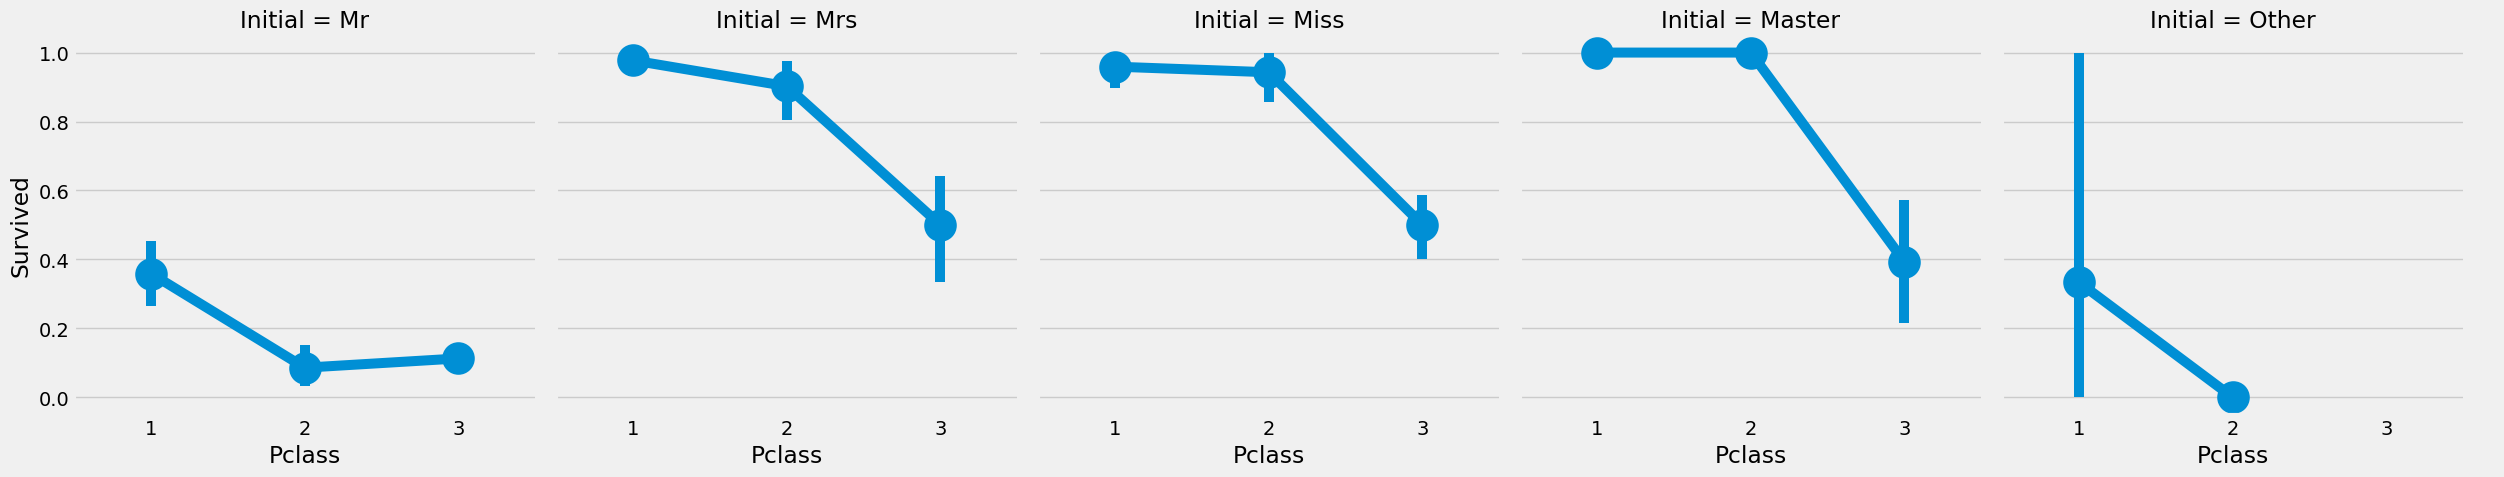

In [22]:
sns.catplot(x='Pclass',y='Survived',col='Initial',data=data, kind="point")
plt.show()

Chính sách ưu tiên phụ nữ và trẻ em được thực thi không kể hành khách thuộc hạng vé nào.

### Embarked (Cảng lên tàu) --> Categorical Value

In [23]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

#### Tỷ lệ sống sót của hành khách theo từng cảng lên tàu

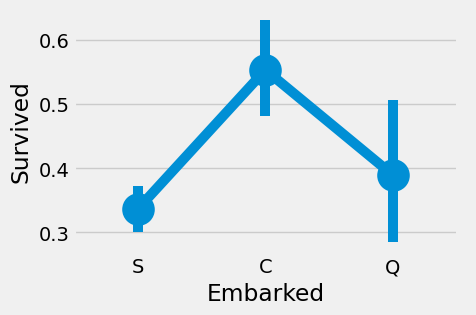

In [24]:
sns.catplot(x='Embarked',y='Survived',data=data, kind="point")
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

Hành khách lên tàu từ cảng C có tỷ lệ sống sót cao nhất khoảng 55% trong khi hành khách lên tàu từ cảng S có tỷ lệ sống sót thấp nhất.

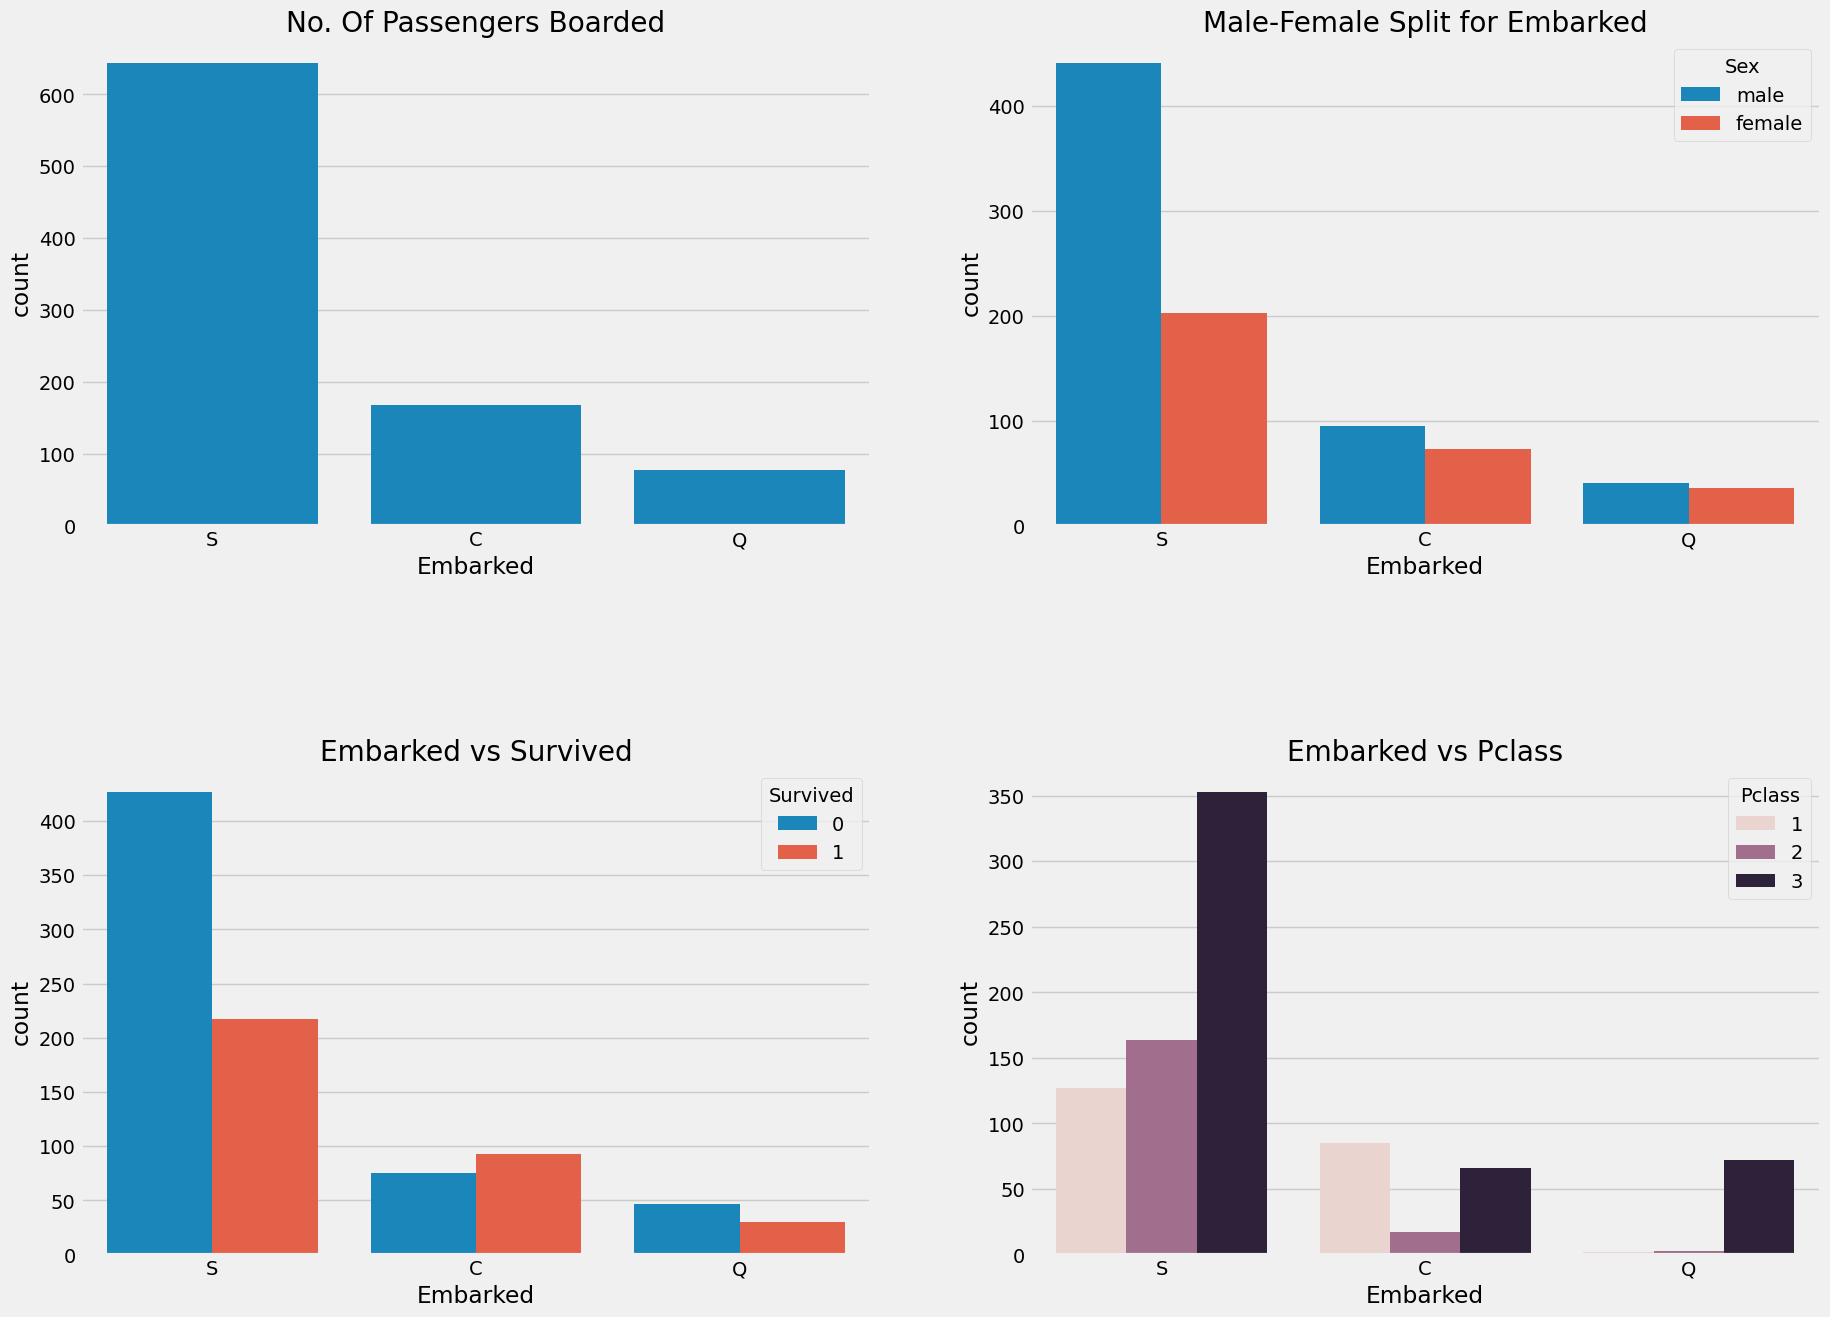

In [25]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

#### Nhận xét:
1)Lượng hành khách lên tàu từ cảng S là nhiều nhất. Và phần lớn trong số họ đi vé hạng 3.

2)Các hành khách lên tàu từ cảng C có tỷ lệ sống sót cao. Lý do có thể do chính sách giải cứu ưu tiên hành khách vé hạng 1 và hàng 2 hơn.

3)Phần lớn hành khách vé hạng 1 và hạng 2 lên tàu ở cảng S tuy nhiên tỷ lệ hành khách lên tàu từ cảng này sống sót khá thấp. Một phần lý do là các hành khách vé hạng 3 có tỷ lệ tử vong rất cao lên đến khoảng 81%.  

4)95% hành khách lên tàu ở càng Q sử dụng vé hạng 3.

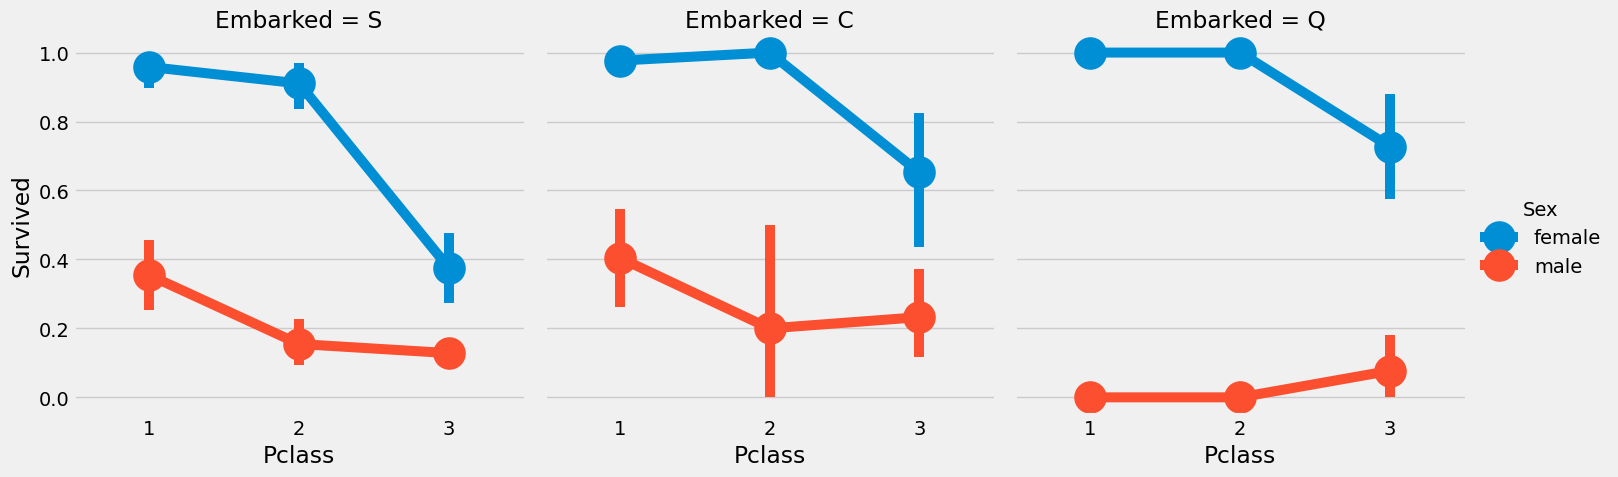

In [26]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data, kind="point")
plt.show()

#### Nhận xét:

1)Với hành khách là nữ giới sử dụng vé hạng 1 hoặc hạng 2 thì tỷ lệ sống sót là gần 100%.

2)Với cảng S các hành khách dùng vé hạng 3 không kể là nam giới hay nữ giới thì đều có tỷ lệ sống sót thấp.**(Money Matters)*

3)Các hành khách nam giới lên tàu từ cảng Q có vẻ kém may mắn nhất khi hầu hết bọn họ đề tử vong. Có thể một phần do tất cả bọn họ đều dùng vé hạng 3.


#### Filling Embarked NaN

Do phần lớn hành khách lên tàu từ cảng S nên nhưng hành khách thiếu thông tin về cảng lên tàu sẽ được điền vào là cảng S.

In [27]:
data['Embarked'].fillna('S',inplace=True)

In [28]:
data.Embarked.isnull().any()# Finally No NaN values

False

### SibSip (Thành viên gia đình) -->Discrete Feature
Thuộc tính này cho biết hành khách đi một mình hay đi cùng với các thành viên trong gia đình của họ.

Sibling (người thân) = brother, sister, stepbrother, stepsister

Spouse (người phối ngẫu) = husband, wife 

In [29]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


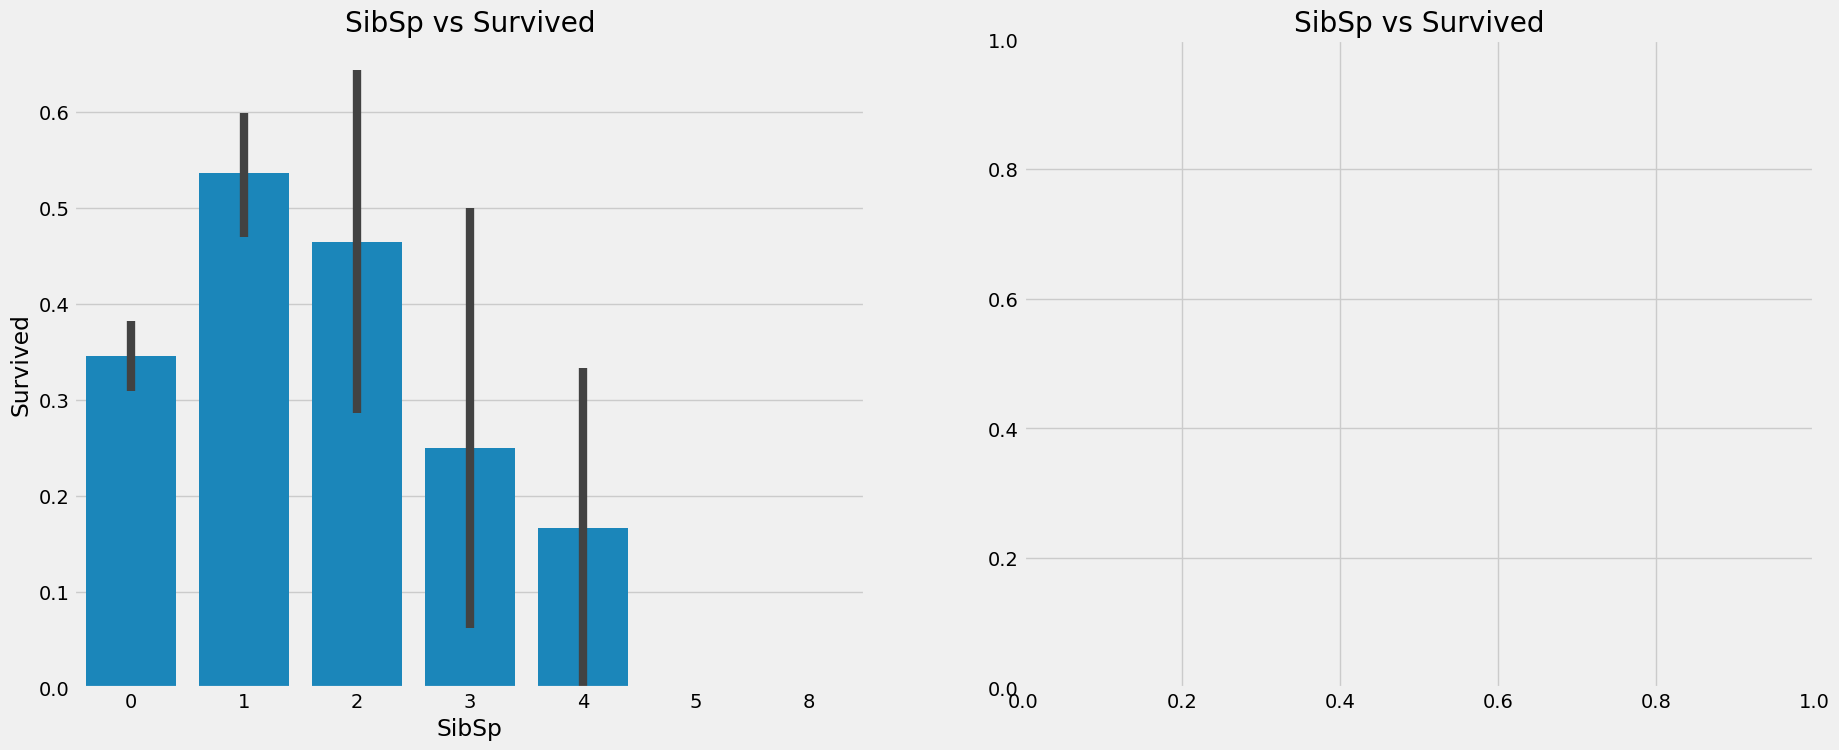

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.catplot(x='SibSp',y='Survived',data=data,ax=ax[1], kind="point")
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [31]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


#### Nhận xét:


Ta thấy nếu một hành khách đi một mình thì tỷ lệ sống sót chỉ khoảng 34,5%. Tỷ lệ sống sót sẽ tăng lện khi số thành viên đi cùng tăng lên. Có vẻ như mọi người trong gia đình có thể giúp đỡ lẫn nhau trong quá trình di tản. Tuy nhiên với các gia đình có từ 5-8 thành viên thì tỷ lệ sống sót là**0%**. Lý do có thể do họ quá đông nên bị rối loạn trong khi di tản hoặc do gia đình nghèo, đông thành viên nên đi vé hạng 3?

Lý do là **Pclass** (hạng vé). Kiểm tra bảng crosstab ta thấy các hành khách đi cùng từ 4 người trở lên đều là hành khách dùng vé hạng 3.

### Parch (Người đi cùng)

In [32]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Bảng crosstab một lần nữa cho thấy các gia đình nhiều thành viên đều đi vé hạng 3.

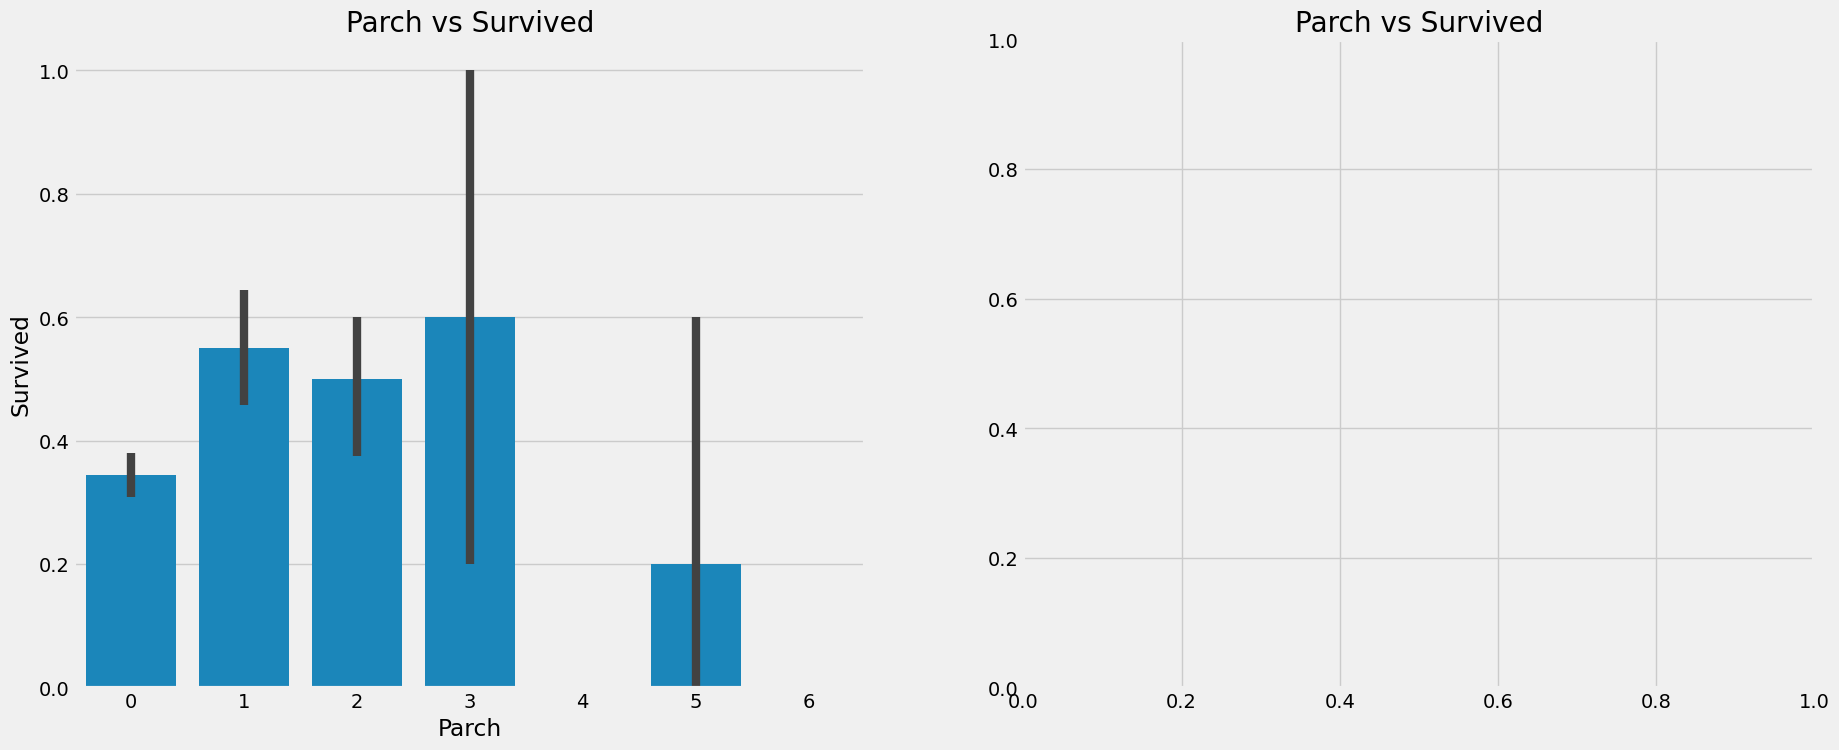

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.catplot(x='Parch',y='Survived',data=data,ax=ax[1], kind="point")
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

#### Nhận xét:

Hai kết quả khá tương đồng với nhau. Các hành khách đi cùng với gia đình có cơ hội sống sót cao hơn. Tuy nhiên tỷ lệ sống sót lại giảm xuống khi số người trong gia đình tăng lên.

Như vậy nhưng hành khách đi cùng gia đình với từ 1-3 thành viên khác sẽ có tỷ lệ sống sót cao. Còn nếu họ đi một mình hoặc với gia đình có từ trên 4 thành viên thì tỷ lệ sống sót là thấp.

### Fare (Giá vé)--> Continous Feature

In [34]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


Giá vé thấp nhất là **0.0**. Đi miễn phí!!! 

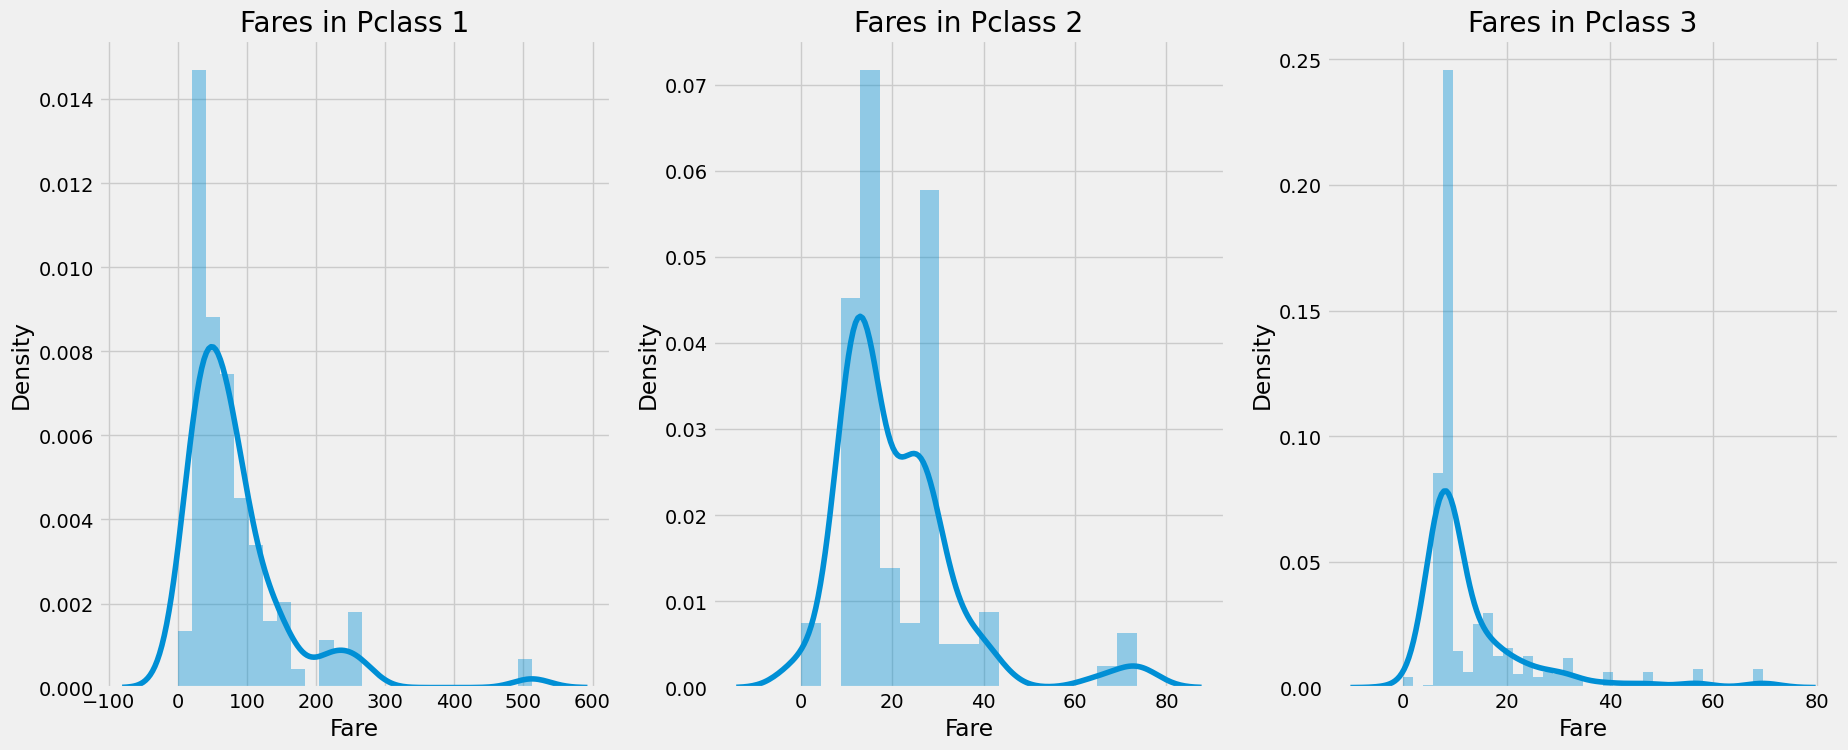

In [35]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Mặc dù giá vé là một đại lượng liên tục, chúng ta có thể nhóm lại thành từng nhóm giá vé và chuyển thuộc tính này thành dạng rời rạc.

## Nhận xét chung về các thuộc tính:
**Sex:** Tỷ lệ sống sót của hành khách nữ giới cao hơn hành khách nam giới.

**Pclass:** Có thể thấy rõ ràng **hành khách vé hạng 1** có tỷ lệ sống sót cao hơn. **Hành khác vé hạng 3** có tỷ lệ sống sót **rất thấp**. Với **nữ giới**, tỷ lệ sống sót khi đi **vé hạng 1** là gần 100% và tỷ lệ này cũng cao với những người đi **vé hạng 2**.   **Money Wins!!!**. 

**Age:** Trẻ em nhỏ hơn khoảng 5-10 tuổi có tỷ lệ sống sót cao. Các hành khách trong độ tuổi từ 15 tới 35 thiệt mạng rất nhiều.

**Embarked:** Đây là một thuộc tính thú vị. **The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S.** Hành khách lên tàu từ cảng Q đều dùng **vé hạng 3**. 

**Parch+SibSp:** Hành khách có 1-2 người thân, người phối ngẫu trên tàu, hoặc đi cùng gia đình từ 1-3 người có tỷ lệ sống sót cao hơn so với những người đi một mình hoặc đi cùng với gia đình quá đông người.

## Mối tương quan (correlation) giữa các thuộc tính

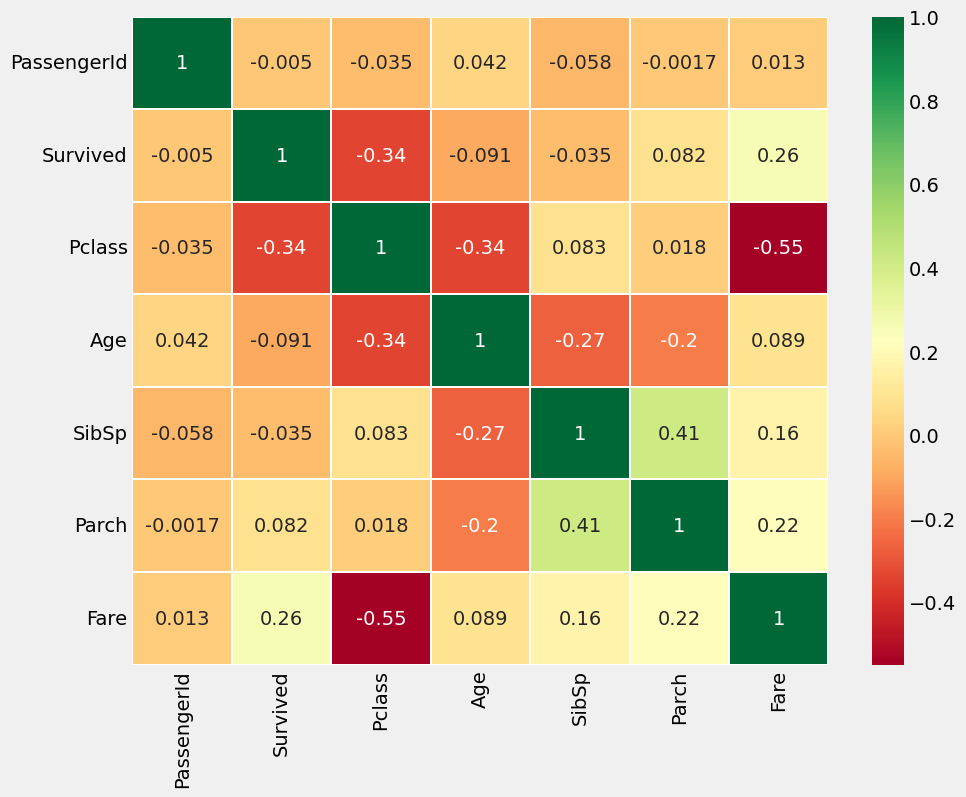

In [36]:
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Nhận xét biểu đồ Heatmap

! Chúng ta chỉ có thể so sánh mối tương quan giữa các thuộc tính dạng số.

**POSITIVE CORRELATION:** (Tỷ lệ thuận) Nếu **thuộc tính A tăng thì thuộc tính B cũng tăng, và ngược lại**. Nếu giá trị corr bằng **1** thì đây là quan hệ **tỷ lệ thuận tuyệt đối**.

**NEGATIVE CORRELATION:** (Tỷ lệ nghịch) Nếu **thuộc tính A giảm thì thuộc tính B tăng, và ngược lại**. Nếu giá trị corr bằng **-1** thì đây là quan hệ **tỷ lệ nghịch tuyệt đối**.

Khi 2 thuộc tính có mối quan hệ tỷ lệ cao hoặc gần như tuyệt đối với nhau thì có nghĩa là chúng chứa đựng những thông tin gần như giống nhau. Chúng ta không nên sử dụng cả 2 thuộc tính dạng này vì **một trong chúng là dư thừa**. Khi chúng ta huấn luyện mô hình học máy, chúng ta nên loại bỏ các thuộc tính dư thừa để có thể giảm thời gian huấn luyện và được thêm nhiều lợi ích khác nữa.

Với biểu đồ heatmap ở trên, ta thấy các thuộc tính không quá liên quan đến nhau. Giá trị tương quan correlation lớn nhất là giữa **SibSp và Parch chỉ 0.41**. Vì vậy chúng ta có thể sử dùng tất cả các thuộc tính này.

# Làm sạch và biến đổi dữ liệu (Feature Engineering)

Feature Engineering là gì?

Với mỗi bộ dữ liệu, không phải bất cứ thuộc tính nào cũng là thuộc tính quan trọng cần sử dụng để giải quyết bài toán. Những thuộc tính dư thừa cần được loại bỏ. Và chúng ta cũng có thể bổ sung thêm các thuộc tính mới, hưu ích được suy luận từ các thuộc tính có sẵn để bổ sung thêm vào dữ liệu. Ví dụ như thuộc tính "Initals" (danh xưng) trong bài này.
Ngoài ra chúng ta cũng cần biến đổi các thuộc tính của dữ liệu để chúng phù hợp làm đầu vào cho các mô hình dự đoán.

## Age_band

#### Vấn đề với thuộc tính Age (tuổi):
Thuôc tính **Age (tuổi)** là thuộc tính dạng **số liên tục**, có một vấn đề với các thuộc tính dạng số liên tục khi sử dụng cho các mô hình học máy.

**Ví dụ:** Khi chúng ta muốn chia một nhóm người thành các nhóm nhỏ theo **Giới tính**, chúng ta sẽ dễ dàng chia họ thuộc nhóm "Nam giới" hoặc "Nữ giới".

Nhưng nếu muốn chia nhóm người đó theo **độ tuổi** thì khó khăn hơn. Giả sử có 30 người, sẽ có thể có 30 tuổi khác nhau.  

Chúng ta cần biến đổi **các giá trị số liên tục thành cách giá trị dạng nhãn** bằng cách dùng kỹ thuật Binning hoặc Normalisation.  

Trong bài toán này hành khách cao tuổi nhất là 80 tuổi. Vậy ta sẽ chia khoảng từ 0-80 thành 5 khoảng tuổi, như vậy mỗi khoảng gồm 16 tuổi (80/5=16).

In [37]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [38]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


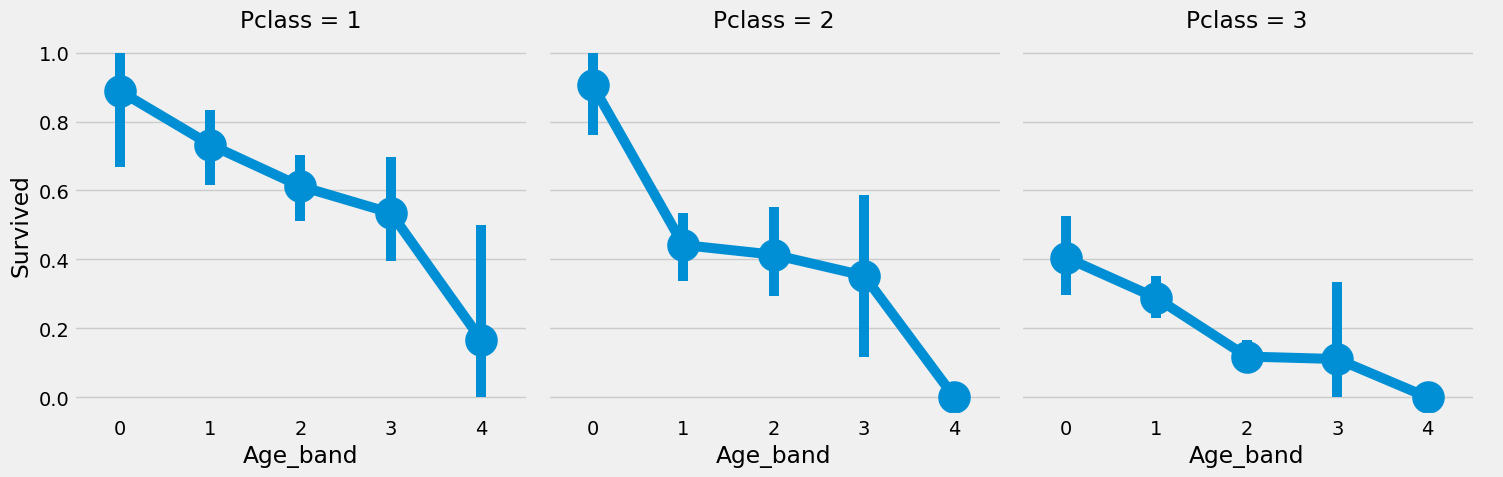

In [39]:
sns.catplot(x='Age_band',y='Survived',data=data,col='Pclass', kind="point")
plt.show()

Ta thấy tỷ lệ sống sót của hành khách giảm đi khi số tuổi tăng lên, bất kể hành khách sử dụng vé hạng gì.

## Family_Size and Alone (Kích thước gia đình)
Chúng ta có thể tạo hai thuộc tính mới là "Family_size" và "Alone".  
Các thuộc tính này được tổng hợp từ 2 thuộc tính là **Parch** và **SibSp**.  
Sự kết hợp này sẽ giúp chúng ta đánh giá được tỷ lệ sống sót của mỗi người có chịu ảnh hưởng bởi số người thân đi cùng họ không.  
Thuộc tính "Alone" cho biết hành khách đó có đi một mình hay không.

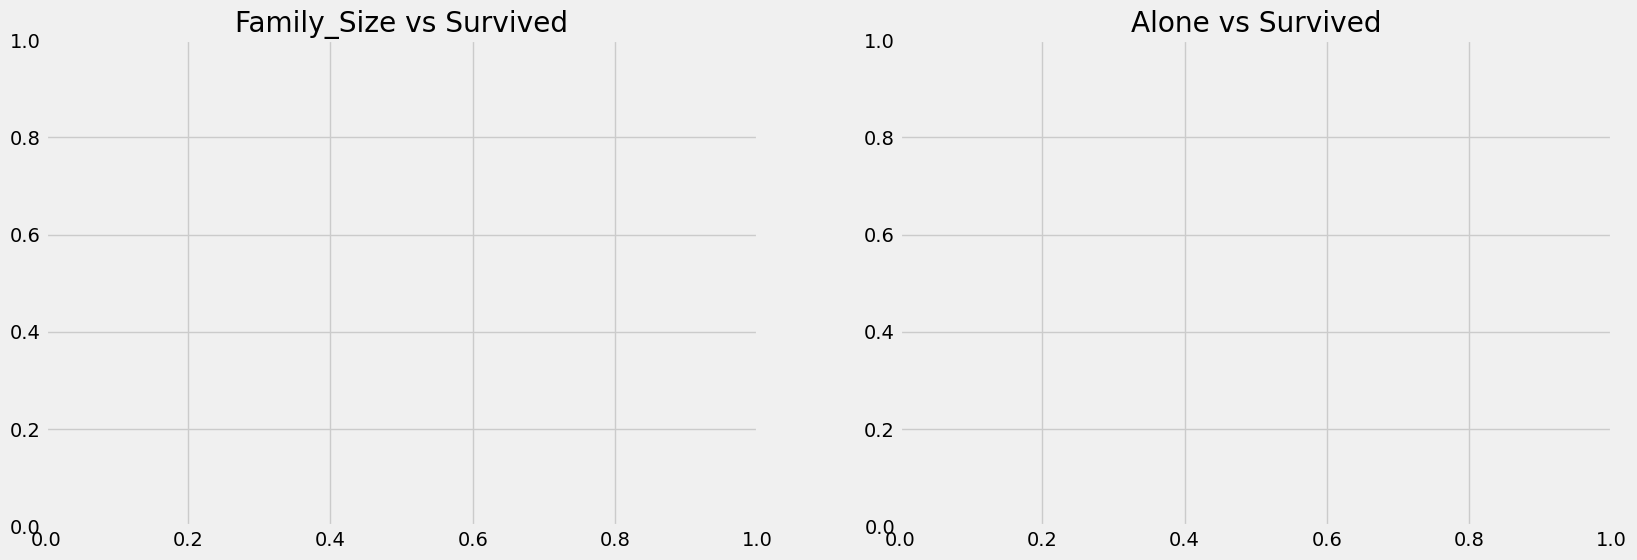

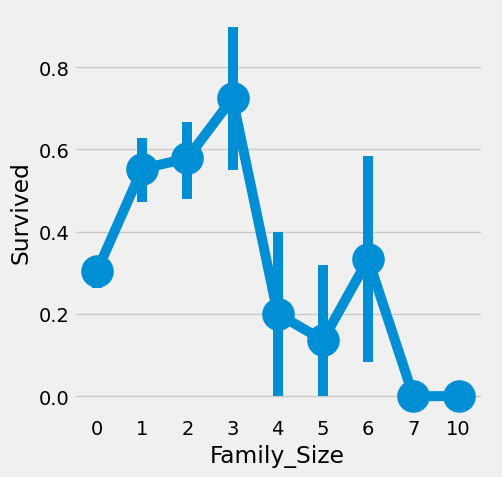

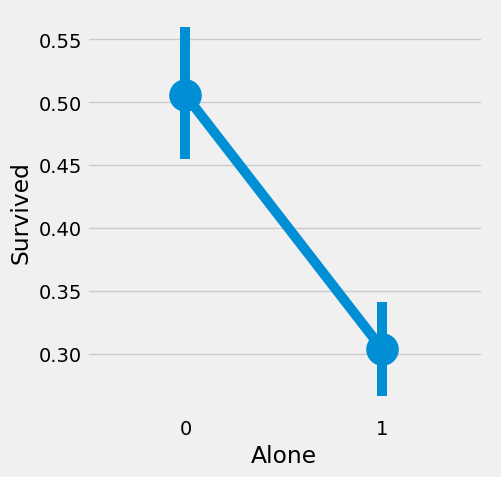

In [40]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.catplot(x='Family_Size',y='Survived',data=data,ax=ax[0],kind="point")
ax[0].set_title('Family_Size vs Survived')
sns.catplot(x='Alone',y='Survived',data=data,ax=ax[1],kind="point")
ax[1].set_title('Alone vs Survived')
# plt.close(2)
# plt.close(3)
plt.show()

**Family_Size=0 means that the passeneger is alone.** Clearly, if you are alone or family_size=0,then chances for survival is very low. For family size > 4,the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.

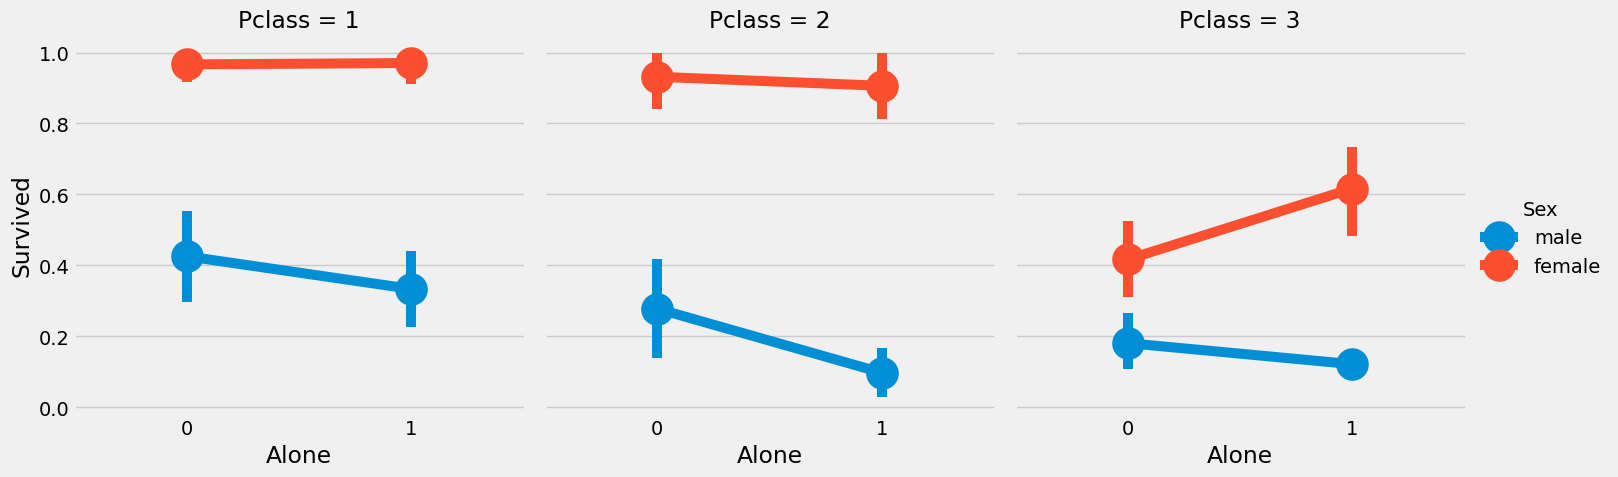

In [41]:
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex',col='Pclass',kind="point")
plt.show()

Chúng ta thấy rõ ràng đi một mình rất nguy hiểm, không kể bạn có giới tính là gì và đi hạng vé nào.  
Chỉ có một ngoại lệ là ở lớp khách sử dụng vé hạng 3 ta thấy các hành khách nữ đi một mình lại có tỷ lệ sống sót cao hơn những phụ nữ đi cùng gia đình.

## Fare_Range

Vì fare (giá vé) cũng là một thuộc tính dạng số liên tục, chúng ta sẽ chuyển nó thành dạng nhãn có thứ tự. Chúng ta có thể sử dụng hàm **pandas.qcut**.

Hàm **qcut** sẽ chia và sắp xếp dữ liệu thành các nhóm dựa theo số lượng nhóm chúng ta yêu cầu. Khi sử dụng số nhóm bằng 5, hàm này sẽ chia dữ liệu thành 5 nhóm sao cho số lượng các hành khách trong mỗi nhóm là bằng nhau.

In [42]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Như trên ta thấy khi **fare_range tăng, tỷ lệ sống sót tăng.**

Do không thể truyền trực tiếp giá trị **Fare_Range** cho mô hình học máy, chúng ta cũng sẽ chuyển đổi nó về dạng số như với thuộc tính **Age_Band**

In [43]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

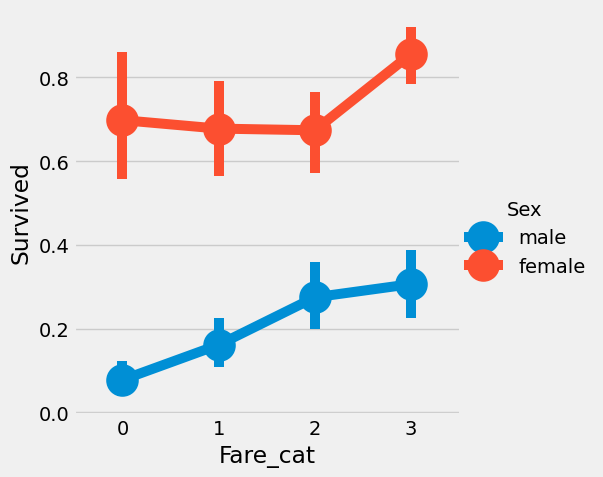

In [44]:
sns.catplot(x='Fare_cat',y='Survived',data=data,hue='Sex',kind="point")
plt.show()

Rất rõ ràng khi **Fare_cat** tăng, tỷ lệ sống sót tăng. Đây cũng sẽ là một thuộc tính rất quan trọng với các mô hình học máy bên cạnh thuộc tính **Sex**.

## Chuyển các dữ liệu dạng chuỗi sang dạng số

Do không thể sử dụng các chuỗi làm đầu vào trực tiếp cho các mô hình học máy, chúng ta cần chuyển đổi các thuộc tính như **Sex, Embarked, vv...** thành các giá trị dạng số.

In [45]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### Loại bỏ các thuộc tính không cần thiết

**Name**--> Chúng ta không sử dụng vì nó không thực sự cần thiết và khó để chuyển đổi thành các thuộc tính dạng nhãn.

**Age**--> Do đã tạo thuộc tính mới Age_band nên chúng ta có thể loại bỏ thuộc tính này.

**Ticket**--> Đây là một chuỗi ngẫu nhiên không có nhiều giá trị.

**Fare**--> Loại bỏ do chúng ta đã tạo thuộc tính mới đại diện cho nó là Fare_cat

**Cabin**--> Bị thiếu dữ liệu quá nhiều, thêm vào đó nhiều hành khách thuộc về nhiều hơn 1 cabin. Thuộc tính này không hưu ích nên bị loại bỏ.

**Fare_Range**--> Đã có thuộc tính fare_cat thay thế.

**PassengerId**--> Không thể chuyển thành dạng nhãn, không có nhiều ý nghĩa nên loại bỏ.

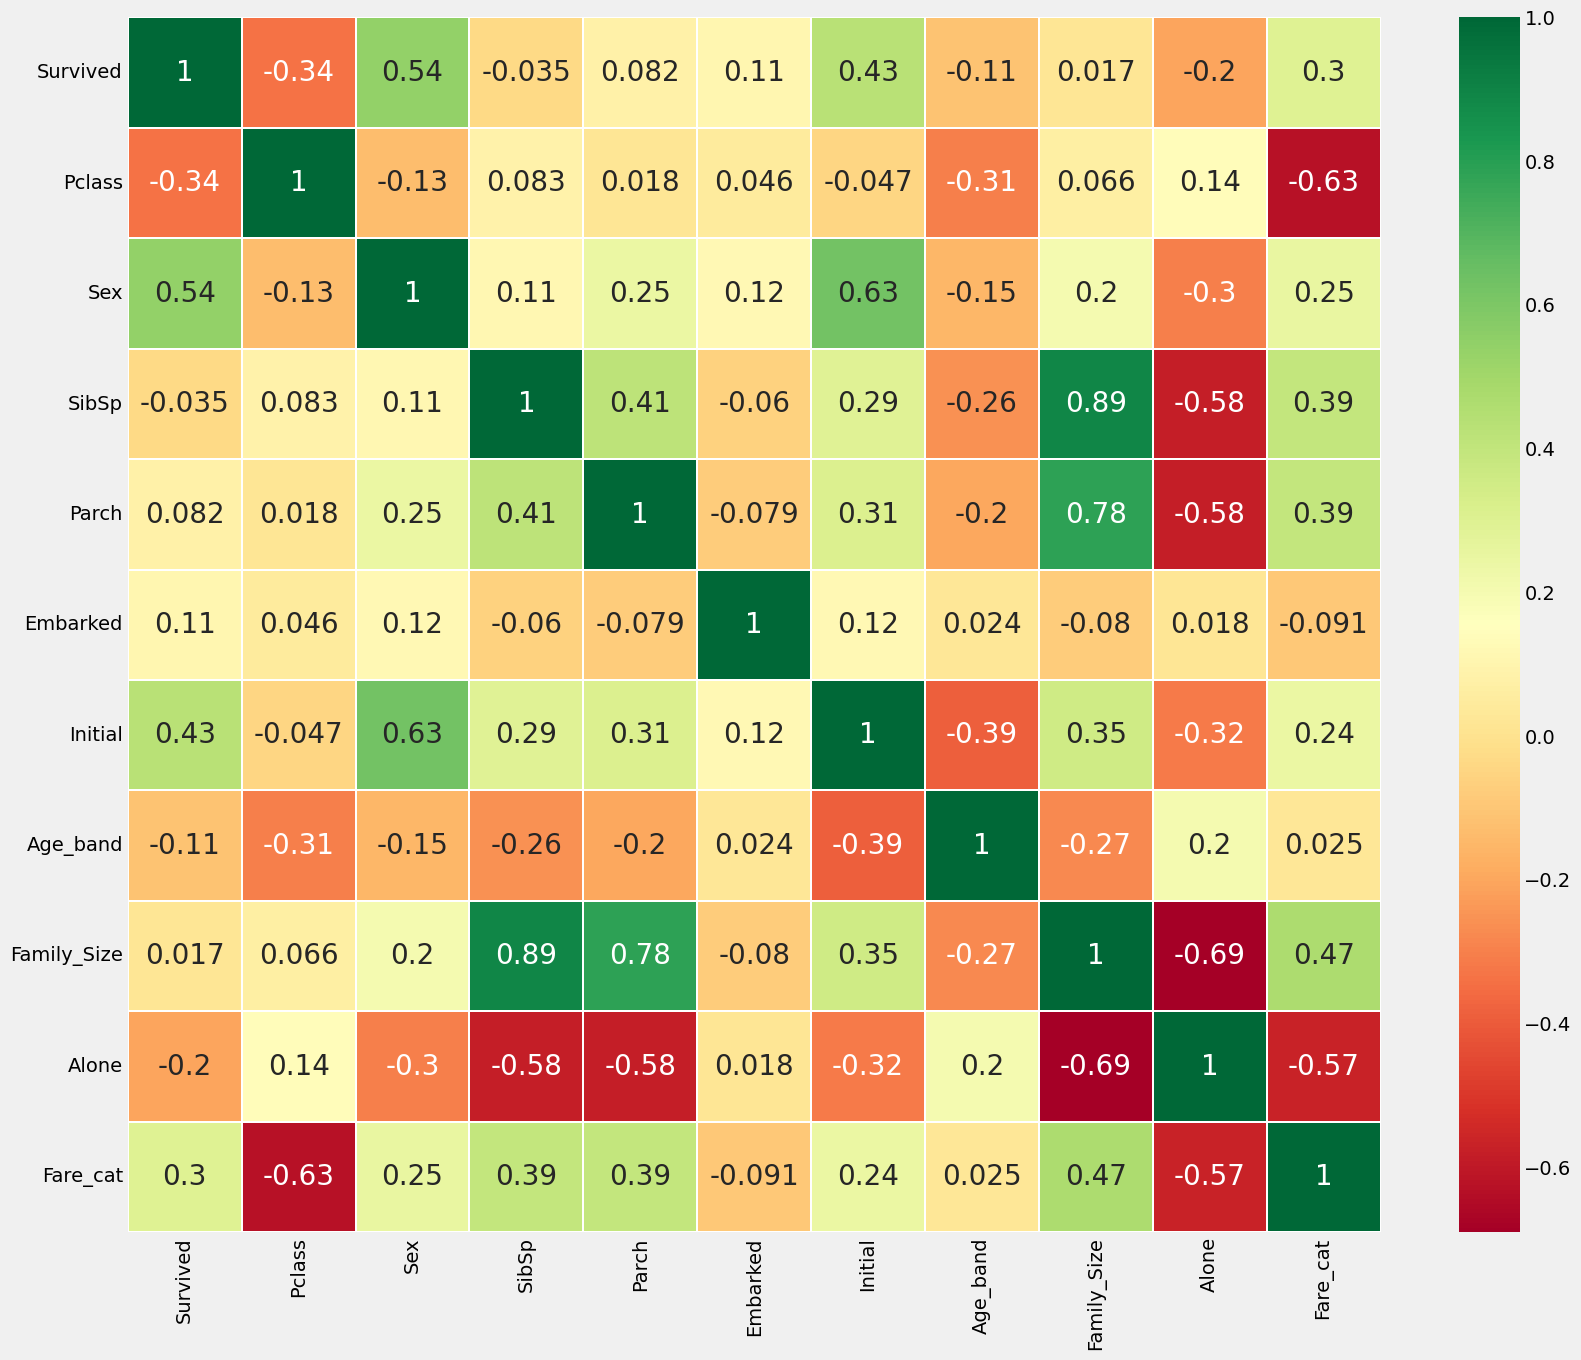

In [46]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Với biểu đồ correlation này ta thấy, có những thuộc tính có mối quan hệ tỷ lệ thuận với nhau như **SibSp và Family_Size** hay **Parch và Family_Size** và các thuộc tính có quan hệ tỷ lệ nghịch như **Alone và Family_Size.**